# TP Supervised Learning

Ce notebook est basé sur le numerical tour de *Gabriel Peyré* qui introduit les notions essentielles à la regression linéaire et logistique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Fonctions utiles :

In [19]:
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

## Exercice 1 : Linear Regression

### Data Simulation

Tout d'abord on simule un problème de régression.

In [46]:
from sklearn import datasets
X, y, coef = datasets.make_regression(n_samples = 100, n_features = 10,
                                n_informative = 4, n_targets = 1,
                                noise = 10.0, coef = True)

**Q: Que fait le code ci-dessus, que font les paramètres ?**

**Q : Séparer le dataset en un ensemble d'apprentissage et de test.**

**Q : Pourquoi n'utilise-t-on pas d'ensemble de validation ici ?**

###  Least square solution

On rappelle que l'estimateur des moindres carrés est donné par : $\hat{\beta} = (X^T X)^{-1} X^Ty $

**Q: Coder une fonction qui permet de calculer une estimation de celui-ci à partir des données.**

In [18]:
def reg_OLS(X,y) :
    pass

**Q: Donner un avis sur les valeurs des paramètres. Que constate-t-on et pourquoi ?**

**Q: Créer une fonction `reg_lin` qui permet de prédire les labels `y` pour de nouvelles données `X`.**

In [ ]:
def reg_lin():
    pass

**Q : Tester sur l'ensemble de test. Quel taux d'erreur avez-vous ? Que pouvez-vous dire ?**

###  Descente de gradient

On rappelle que l'objectif est de minimiser $f(\beta) = \frac{1}{2} \| X\beta - y \|^2$

**Q: Coder la fonction de perte (loss) `f` qui prend en paramètres la matrice X, y et $\beta$.**

In [ ]:
def f():
    pass

On rappelle aussi que le gradient de $f$ est : $\nabla f(\beta) = X^T(X\beta - y)$.

**Q: Coder la fonction  `grad_f` qui prend en paramètre la matrice X, y et $\beta$**

In [ ]:
def grad_f():
    pass

Maintenant, codons la descente de gradient, on rappelle que le passage de l'algorithme de l'étape $m$ à $m+1$ est donné par :
$$
\beta^{(m+1)} = \beta^{(m)} - \tau \nabla f(\beta^{(m)}),
$$
où $\tau$ est le pas de la descente.

**Q : Coder la fonction `Reg_lin_desc_grad` qui prend en entrée :`X`,`y`, `w` (initialisation de beta), `tau`, `n_iter` (le nombre d'itérations maximum), `tol` (la tolérance de la convergence).**

Dans un second temps, cette fonction doit aussi afficher l'evolution de l'erreur d'entraînement comme une fonction du nombre d'itération.

In [52]:
def Reg_lin_desc_grad(X,y,w,tau = 1/np.linalg.norm(X,2)**2 ,n_iter=50,tol = 1e3,plot=True):
    pass

La variable `tau` définie en amont est donnée par un critère du controle de norme, il ne faut pas que le pas de l'algorithme dépasse  :
$$
\tau_{max} = \dfrac{2}{\| X X^T\|_{op}},
$$
avec $\| .\|_{op}$ est la valeur propre maximal.

**Q : Tester pour différentes valeurs de $\tau$, que constatez-vous ?** (Convergence, estimation, etc.)

###  Scikit-Learn

In [50]:
from sklearn.linear_model import LinearRegression
Model_LinearReg = LinearRegression()

**Q: Que contient cet objet ? Comment mettre à jour ses poids ? Que dire des paramètres ?**

###  OLS / Gradient descent / Scikit-learn (learning time)

Cette partie dépendra grandement de votre machine et de votre implémentation, toutefois elle permettra de vous faire une idée quant au choix de la méthode à privilégier.

In [51]:
from time import time 
t1 = time() 
#Quelque chose
t2 = time()
elapsed = t2 - t1 
print('Elapsed time is %f seconds.' % elapsed) 

Elapsed time is 0.023273 seconds.


**Q : Que fait le code ci-dessus ?**

**Q: Afficher l'évolution du temps de calcul en faisant varier le nombre d'individus dans le dataset  N = 100 : 100000 (pas logartihmique) et en laissant fixé p = 40.** 

**Q: Afficher l'évolution du temps de calcul en faisant varier le nombre de variables dans le dataset p = 40:5000 (pas logarithmique) et en laissant le nombre d'individus fixé N = 10000.**

###  Gradient descent / Scikit-learn (performances)

**Q: Comparer les performances de prédiction sur l'ensemble de test. Y a-t-il des différences ? Si oui, pourquoi ?**

## Exercice 2 : Logistic Regression

### Data Simulation

In [78]:
n = 1000 # number of sample
p = 2 # dimensionality
omega = np.array([1,.5])*2.5 # offset 
n1 = int(n/2)
X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

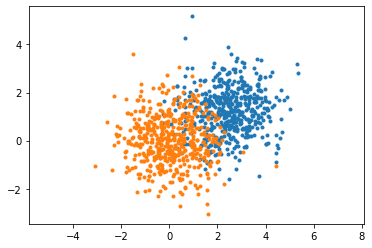

In [79]:
I = find(y==-1)
J = find(y==1)
plt.clf
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal');

###  Descente de gradient

On rappelle que l'objectif de minimiser $g(\beta) = \dfrac{1}{n} \sum_{i=1:n}  \log(1 + e^{-yi \langle X_i , \beta \rangle})$.

**Q: Coder la fonction de loss `g` qui prend en paramètre la matrice X, y et $\beta$.**

In [92]:
def g():
    pass

On rappelle aussi que le gradient de $g$ est : $$\nabla g(\beta) = \dfrac{1}{n} X^T y \odot \sigma(- y \ \odot <X,\beta>),$$
où $\odot$ est le produit élément par élément (* en python) et $\sigma$ est la fonction sigmoide.

**Q: Coder la fonction  `grad_g` qui prend en paramètre la matrice X, y et $\beta$.**

In [ ]:
def grad_g():
    pass

Maintenant, codons la descente de gradient. On rappelle que le passage de l'algorithme de l'étape $m$ à $m+1$ est donné par :
$$
\beta^{(m+1)} = \beta^{(m)} - \tau \nabla g(\beta^{(m)}),
$$
où $\tau$ est le pas de la descente.

**Q : Coder la fonction `Reg_log_desc_grad` qui prend en entrée :`X`,`y`, `w` (initialisation de beta), `tau`, `n_iter` (le nombre d'itérations maximum), `tol` (la tolérence de la convergence).**

Dans un second temps, cette fonction doit aussi afficher l'évolution de l'erreur d'entraînement comme une fonction du nombre d'itération.

In [56]:
def Reg_log_desc_grad(X,y,w,tau = 1/np.linalg.norm(X,2)**2 ,n_iter=50,tol = 1e3,plot=True):
    pass

La variable `tau` définie en amont est donnée par un critère du contrôle de la norme, il ne faut pas que le pas de l'algorithme dépasse  :
$
\tau_{max} = \dfrac{2}{ 1/4\| X \|_{op}^2},
$
avec $\| .\|_{op}$ est la valeur propre maximale.

**Q : Tester différentes valeurs de $\tau$, que constatez-vous ?** (Convergence, estimation, ...)

###  Scikit-Learn

In [58]:
from sklearn.linear_model import LogisticRegression
Model_LogReg = LogisticRegression()

**Q: Que contient cet objet ? Comment mettre à jour ses poids ? Que dire des paramètres ?**

###  Gradient descent / Scikit-learn (learning time)

Cette partie dépendra grandement de votre machine et de votre implémentation, toutefois elle permettra d'avoir des idées de quand utiliser un algorithme plutôt que l'autre.

On pose $\beta^\star_j = (-1)^{j-1} \exp(-(j-1)/10)$.

Text(0.5, 1.0, 'Parameters')

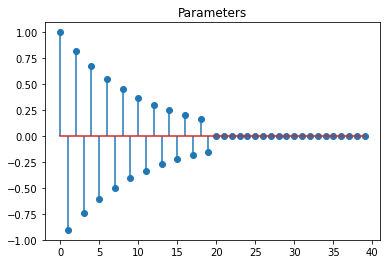

In [3]:
n_features = 40
n_samples = 2000

%matplotlib inline

idx = np.arange(n_features)
params = (-1) ** idx  * np.exp(-idx / 10.)
params[20:] = 0.
plt.stem(params)
plt.title("Parameters")

In [4]:
import numpy as np
import copy
def sigmoid(a):
    x = copy.deepcopy(a)
    if(x.size ==1) :
        if x >= 0:
            return 1.0 / (1.0 + np.exp(-x))
        else : 
            # Utilisez la formule sigmoid(x) = 1 - sigmoid(-x) pour x < 0
            return np.exp(x) / (1.0 + np.exp(x))
        
        
    neg_part = find(x<=0)
    pos_part = find(x>0)
    if pos_part.size >= 0:
        x[pos_part] = 1.0 / (1.0 + np.exp(-x[pos_part]))
        
    if neg_part.size >= 0: 
        x[neg_part] = np.exp(x[neg_part]) / (1.0 + np.exp(x[neg_part]))
    
    return x

In [5]:
from numpy.random import multivariate_normal
from scipy.linalg.special_matrices import toeplitz
from numpy.random import binomial
def simu_logreg(n_samples,params=params,rho=0.1):
    """ simulation in a logistic regression model 
    
    Parameters
    ----------
    coefs : `numpy.array`, shape=(n_features,)
        Coefficients of the model
    n_samples : `int`, 
        Number of samples to simulate
    rho : `float`, default=0.1
        Correlation of the features
    Returns
    -------
    X : `numpy.ndarray`, shape=(n_samples, n_features)
    Simulated features matrix. It samples of a centered Gaussian
    vector with covariance given by the Toeplitz matrix
    y : `numpy.array`, shape=(n_samples,)
                 Simulated labels
    """
    n_features = params.size
    
    cov = toeplitz(rho ** np.arange(0, n_features))
    
    features = multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    
    pis = sigmoid(features.dot(params))
    
    labels = 2 * ( binomial(1,pis, n_samples) - 1)
    
    return((features,labels))

In [6]:
X_perfs,y_perfs = simu_logreg(2000,params,rho = 0.1)
print(y_perfs.shape)
print(X_perfs.shape)

(2000,)
(2000, 40)


**Q: Que fait le code ci-dessus ? Détailler.**

**Q: Afficher l'évolution du temps de calcul en fonction du nombre d'individus dans le dataset  N = 100 : 100000 et p = 40** 

**Q: Afficher l'évolution du temps de calcul en fonction de variables dans le dataset  N = 10000 et p = 40:5000**

**Q: Afficher l'évolution du temps de calcul en faisant varier le nombre d'individus dans le dataset  N = 100 : 100000 (pas logartihmique) et en laissant fixé p = 40.**

**Q: Afficher l'évolution du temps de calcul en faisant varier le nombre de variables dans le dataset p = 40:5000 (pas logarithmique) et en laissant le nombre d'individus fixé N = 10000.**

###  Gradient descent / Scikit-learn (performances)

**Q: Comparer les performances de prédiction sur l'ensemble de test. Y a-t-il des différences ? Si oui, pourquoi ?**

###  Frontières de décision

En utilisant les fonctions de régression logistique (au choix : celle que vous avez implémentée ou celle de scikit-learn) on va maintenant tracer les frontières de décisions de notre modèle.

On génère une grille de points en 2D.

In [76]:
q = 201
tx = np.linspace( X[:,0].min(), X[:,0].max(),num=q) 
ty = np.linspace( X[:,1].min(), X[:,1].max(),num=q) 
[B,A] = np.meshgrid( ty,tx )
G = np.vstack([A.flatten(), B.flatten()]).transpose()

**Q: Calculer les probabilités de classe associées à chacun des vecteurs composant la grille.**

In [ ]:
proba_pred = ... 

In [86]:
proba_class1 = proba_pred[:,0].reshape(q,q)

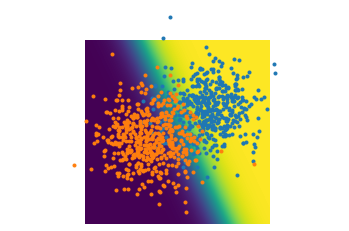

In [91]:
plt.clf
plt.imshow(proba_class1.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('off');

## Exercice 3 : Penalized Regression

In [95]:
help(LogisticRegression)
help(LinearRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

**Q: Dans l'aide, quel est l'argument qui permet de gérer la pénalité utilisée ?**

**Q: [Regression] Comparer les différentes pénalisations en termes de performances sur l'ensemble d'apprentissage et de test ainsi que sur l'estimation des coefficients. Commenter.**

**Q: [Classification] Comparer les différentes pénalisations en termes de performances sur l'ensemble d'apprentissage et de test ainsi que sur l'estimation des coefficients. Commenter.**

**Q: Créer une procédure d'optimisation des hyper-paramètres.**

## Exercice 4 : Decision Tree and random Forest

### Arbre de décision

The DecisionTreeClassifier() of the library ‘tree’ implements the decision tree for classification.

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Q: Quels sont les hyper-paramètres d'un arbre de décision ? Quelless sont les valeurs par défaut de `DecisionTreeClassifier()`?**

**Q: Calculer la prédiction des classes associées à toutes les entrées de l'ensemble des données de la grille et visualiser les frontières de décision.**

In [ ]:
from sklearn.tree import export_text
r = export_text(treefit); # treefit -> Model
print(r)

**Q: Que fait le code ci-dessus ?**

**Q: Créer une procédure d'optimisation des hyper-paramètres.**

### Forêts aléatoires

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**Q: Quels sont les hyper-paramètres d'un arbre de décision ? Quelles sont les valeurs par défaut de `DecisionTreeClassifier()`?**

**Q: Calculer la prédiction des classes associées à toutes les entrées de l'ensemble de données de la grille et visualiser les frontières de décision.**

**Q: Créer une procédure d'optimisation des hyper-paramètres.**

## Exercice 5

**Q: Appliquer tout ce que vous avez vu au cours de ce TP au dataset [Maternal Health Risk](https://archive.ics.uci.edu/dataset/863/maternal+health+risk).**